In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
df_merged = pd.read_csv('merged_PhilWeather.csv', low_memory=False)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678842 entries, 0 to 1678841
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trip_id              1678842 non-null  int64  
 1   duration             1678842 non-null  int64  
 2   start_time           1678842 non-null  object 
 3   end_time             1678842 non-null  object 
 4   start_station        1678842 non-null  int64  
 5   end_station          1678842 non-null  int64  
 6   bike_id              1678842 non-null  object 
 7   plan_duration        1678842 non-null  int64  
 8   trip_route_category  1678842 non-null  object 
 9   passholder_type      1678842 non-null  object 
 10  bike_type            1678842 non-null  object 
 11  Date_s               1678842 non-null  object 
 12  Weekday_s            1678842 non-null  int64  
 13  Hour_s               1678842 non-null  int64  
 14  Date_e               1678842 non-null  object 
 15

In [3]:
df_merged.dropna(subset=['idle_time_minutes'], inplace=True)

In [4]:
df_merged['month'] = pd.to_datetime(df_merged['Date_e']).dt.month
from sklearn.preprocessing import OneHotEncoder

# Create a dictionary to map months to their corresponding season
seasons = {
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
    1: 'Winter',
    2: 'Winter'
}

df_merged['season'] = df_merged['month'].map(seasons)
encoder = OneHotEncoder(sparse=False)
df_merged['season'] = encoder.fit_transform(df_merged[['season']])

C:\Users\r-cet\anaconda3\envs\DSML_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
df_merged['hour_sin'] = np.sin(2 * np.pi * df_merged['Hour_e'] / 24)
df_merged['hour_cos'] = np.cos(2 * np.pi * df_merged['Hour_e'] / 24)

In [6]:
df_merged['avg_duration_passholder'] = df_merged.groupby(['passholder_type'])['duration'].transform('mean')

In [7]:
df_merged['passholder_indego'] = np.where((df_merged['passholder_type'] == 'Indego30') | (df_merged['passholder_type'] == 'Indego365'), 1, 0)
df_merged.drop('passholder_type', axis=1, inplace=True)
df_merged['is_weekday'] = np.where((df_merged['Weekday_e'] < 5), 1, 0)
df_merged.drop('Weekday_e', axis=1, inplace=True)

In [8]:
station_trip_counts = df_merged.groupby(['end_station', 'Date_e'])['trip_id'].count()

avg_trip_count = station_trip_counts.groupby('end_station').mean()

df_merged['average_trip_count_per_day'] = df_merged['end_station'].map(avg_trip_count)

In [9]:
df_merged.drop(['trip_id', 'duration', 'Date_e'], axis=1, inplace=True)

In [10]:
poi = pd.read_csv('Counted_POI.csv', low_memory=False)
poi.describe()

,Station,POI_Count
count,198.000000,198.000000
mean,3145.045455,17.797980
std,92.322888,20.621796
min,3004.000000,0.000000
25%,3059.250000,4.000000
50%,3152.500000,9.000000
75%,3235.750000,24.000000
max,3300.000000,100.000000


In [11]:
df_merged = df_merged.merge(poi, left_on='end_station', right_on='Station', how='left')
df_merged.drop(columns=['Station', 'bike_id'], inplace=True)
df_merged

,start_time,end_time,start_station,end_station,plan_duration,trip_route_category,bike_type,Date_s,Weekday_s,Hour_s,...,bad_weather,month,season,hour_sin,hour_cos,avg_duration_passholder,passholder_indego,is_weekday,average_trip_count_per_day,POI_Count
0,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,3157,30,One Way,standard,2021-01-01,4,0,...,0,1,0.0,0.000000,1.000000,17.235601,1,1,12.520604,5
1,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,3010,30,One Way,standard,2021-01-01,4,0,...,0,1,0.0,0.000000,1.000000,17.235601,1,1,40.227397,31
2,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,3201,30,One Way,standard,2021-01-01,4,0,...,0,1,0.0,0.000000,1.000000,17.235601,1,1,16.284722,25
3,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,3034,30,One Way,standard,2021-01-01,4,0,...,0,1,0.0,0.000000,1.000000,17.235601,1,1,18.556630,5
4,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,3040,30,One Way,standard,2021-01-01,4,0,...,0,1,0.0,0.000000,1.000000,17.235601,1,1,15.864011,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678827,2022-12-31 23:44:00,2023-01-01 00:07:00,3244,3287,30,One Way,standard,2022-12-31,5,23,...,1,1,0.0,0.000000,1.000000,17.235601,1,0,3.121495,0
1678828,2022-12-31 23:45:00,2023-01-01 00:02:00,3295,3054,30,One Way,electric,2022-12-31,5,23,...,1,1,0.0,0.000000,1.000000,17.235601,1,0,33.231405,24
1678829,2022-12-31 23:51:00,2022-12-31 23:59:00,3255,3046,30,One Way,electric,2022-12-31,5,23,...,1,12,0.0,-0.258819,0.965926,17.235601,1,0,28.125517,58
1678830,2022-12-31 23:54:00,2023-01-01 00:16:00,3255,3113,30,One Way,electric,2022-12-31,5,23,...,1,1,0.0,0.000000,1.000000,17.235601,1,0,2.875465,7


In [12]:
df_merged['summer_winter'] = np.where((df_merged['month'] >= 4) & (df_merged['month'] < 10 ), 1, 0)

In [13]:
df_merged.drop(['start_time', 'end_time', 'start_station', 'plan_duration', 'trip_route_category', 'bike_type',
               'Date_s', 'Weekday_s', 'Hour_s', 'start_coordinates', 'end_coordinates', 'idle_time'], axis=1, inplace=True)
df_merged.rename(columns={
    'bad_weather': 'bad_weather_condition',
    'Hour_e': 'hour',
    'average_trip_count_per_day': 'avg_trip_count',
}, inplace=True)

In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678832 entries, 0 to 1678831
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   end_station              1678832 non-null  int64  
 1   hour                     1678832 non-null  int64  
 2   temperature              1678832 non-null  float64
 3   windspeed                1678832 non-null  float64
 4   idle_time_minutes        1678832 non-null  float64
 5   bad_weather_condition    1678832 non-null  int64  
 6   month                    1678832 non-null  int64  
 7   season                   1678832 non-null  float64
 8   hour_sin                 1678832 non-null  float64
 9   hour_cos                 1678832 non-null  float64
 10  avg_duration_passholder  1678832 non-null  float64
 11  passholder_indego        1678832 non-null  int32  
 12  is_weekday               1678832 non-null  int32  
 13  avg_trip_count           1678832 non-null 

<Axes: >

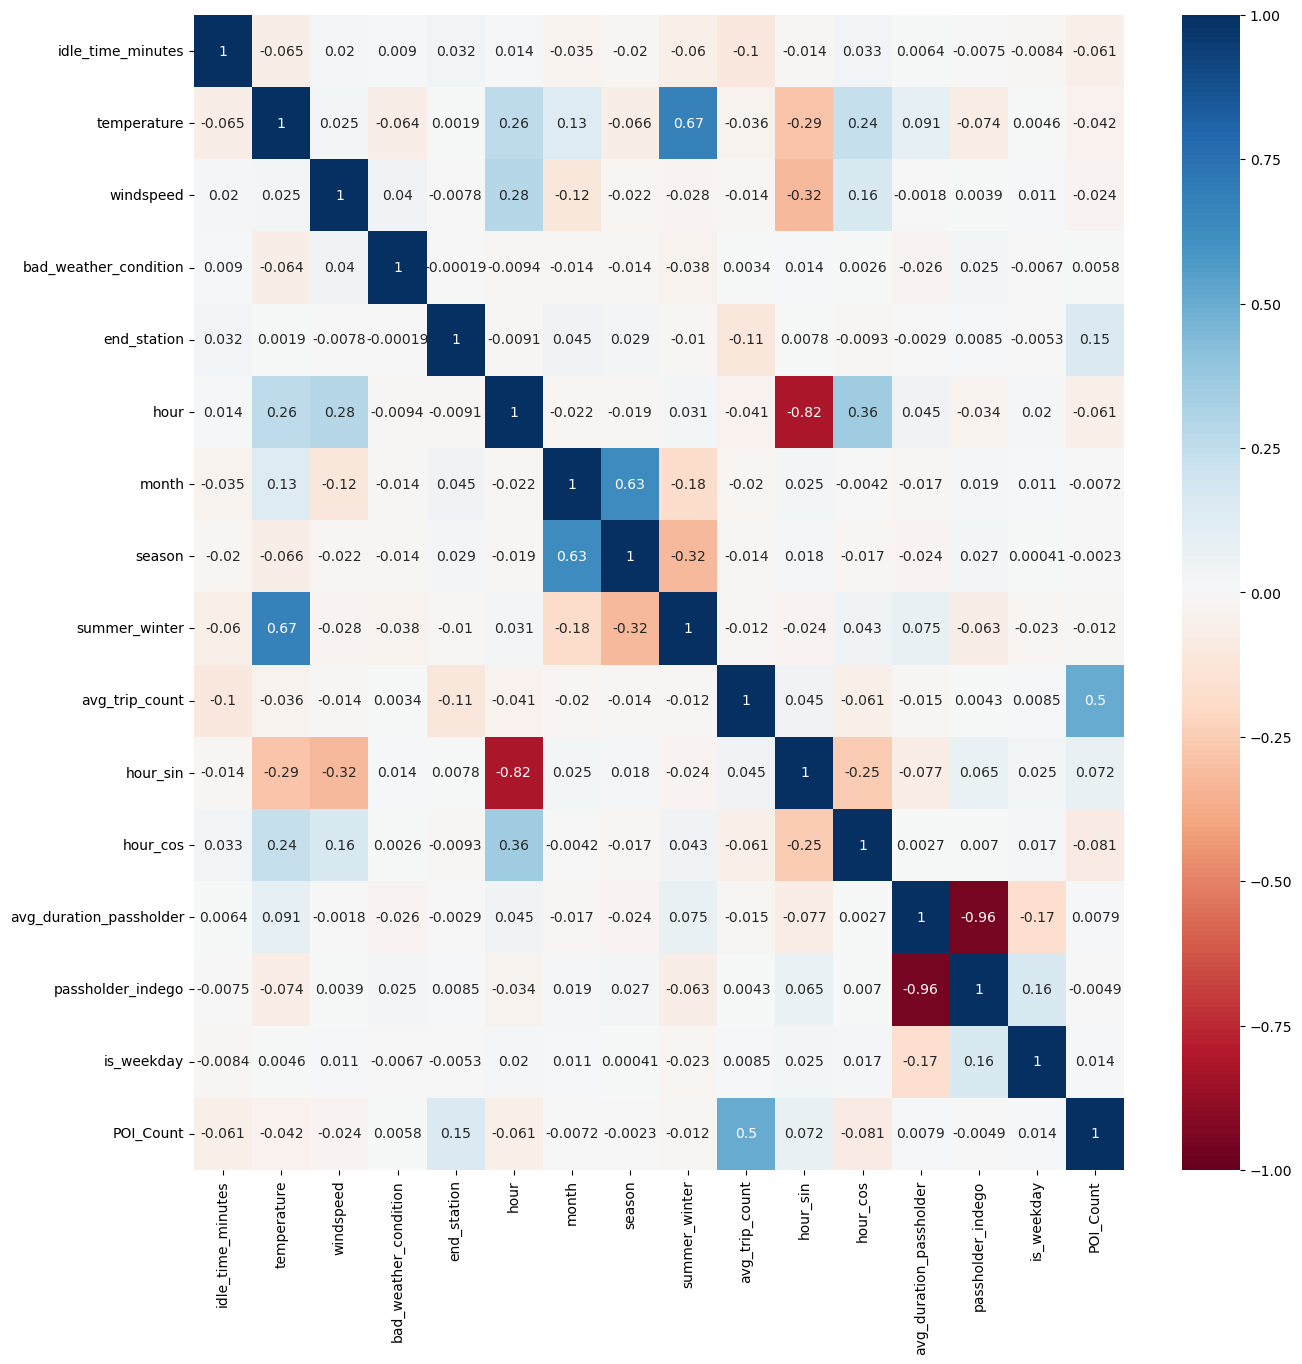

In [16]:
features = df_merged[['idle_time_minutes','temperature', 'windspeed', 'bad_weather_condition',
                 'end_station', 'hour', 'month', 'season', 'summer_winter', 'avg_trip_count',
                'hour_sin', 'hour_cos', 'avg_duration_passholder', 'passholder_indego','is_weekday','POI_Count']]
corr = features.corr()
# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [18]:
df_merged.to_csv('predict_bike.csv', index=False)